<a href="https://colab.research.google.com/github/arwahh/Data_projects/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()

Saving students.csv to students.csv


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:


df = pd.read_csv('students.csv')
df.head()

,StudentID,Name,Age,Email,Department,GPA,GraduationYear
0,3336,David Palmer,19,sean43@hotmail.com,Mathematics,3.16,2026
1,8774,Andrew Roach,23,vbecker@harvey.com,Chemistry,3.75,2027
2,1396,Jonathan Gonzalez,22,hollydavis@gmail.com,Physics,2.95,2027
3,6716,Kenneth Morrow,24,ganderson@wheeler-atkins.info,Physics,3.55,2029
4,8830,Kaitlyn Martinez,18,hayesdiane@gmail.com,Chemistry,2.29,2025


In [14]:
df.shape
df.columns
df.dtypes

,0
StudentID,int64
Name,object
Age,int64
Email,object
Department,object
GPA,float64
GraduationYear,int64


In [15]:
df.isnull().sum()

,0
StudentID,0
Name,0
Age,0
Email,0
Department,0
GPA,0
GraduationYear,0


In [16]:
df.describe()

,StudentID,Age,GPA,GraduationYear
count,200.000000,200.000000,200.00000,200.000000
mean,5726.460000,21.580000,3.02785,2027.180000
std,2507.407622,2.267002,0.59112,2.011924
min,1066.000000,18.000000,2.00000,2024.000000
25%,3693.000000,20.000000,2.52500,2025.000000
50%,5641.000000,22.000000,3.08000,2027.000000
75%,8025.750000,24.000000,3.51000,2029.000000
max,9985.000000,25.000000,3.99000,2030.000000


In [18]:
df.fillna(df.mean(numeric_only=True),inplace=True)

In [19]:
df.drop_duplicates(inplace=True)

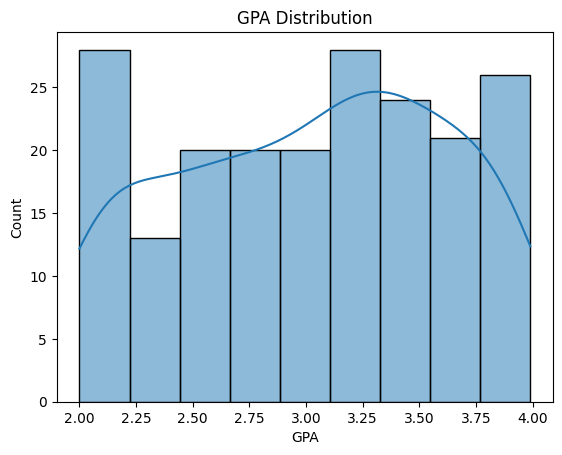

In [21]:
#distribution of score
sns.histplot(df['GPA'], kde=True)
plt.title("GPA Distribution")
plt.show()

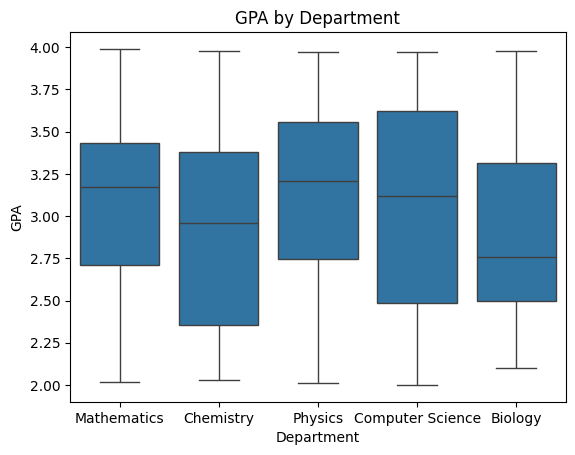

In [23]:
#Gender wise performance
sns.boxplot(x='Department', y='GPA', data=df)
plt.title("GPA by Department")
plt.show()

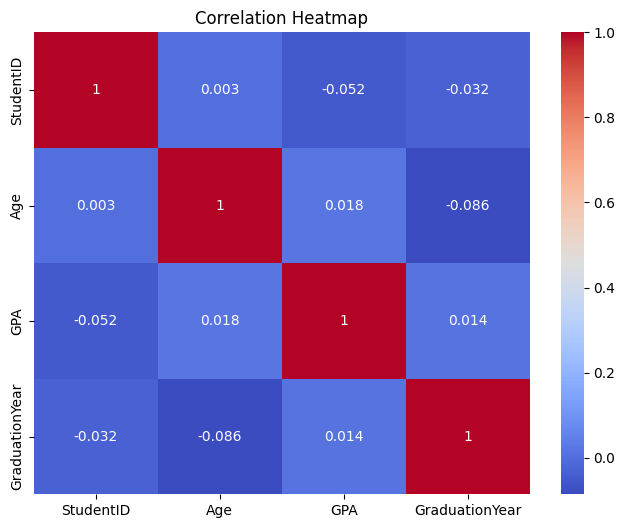

In [25]:
#Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [29]:
df.groupby('Department')['GPA'].mean()

,GPA
Department,
Biology,2.915556
Chemistry,2.936304
Computer Science,3.044348
Mathematics,3.080667
Physics,3.123922


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Using existing numerical columns for X and y
X = df[['Age']]  # Example: using Age as the independent variable
y = df['GPA']    # Example: using GPA as the dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Model R-squared: {model.score(X_test, y_test):.2f}")
print(f"Model intercept: {model.intercept_:.2f}")
print(f"Model coefficient for Age: {model.coef_[0]:.2f}")

Model R-squared: -0.02
Model intercept: 3.03
Model coefficient for Age: -0.00


This project focused on analyzing student data to understand academic patterns and performance. The dataset included information such as age, department, GPA, and graduation year.

From the analysis, it was observed that most students belong to the Computer Science department, and the average GPA of students is satisfactory. The majority of students fall within a similar age group, indicating a consistent academic structure.

Overall, this analysis helps in identifying trends and can be useful for academic planning, performance evaluation, and decision-making in educational institutions.
